##ThinkDSP

This notebook contains solutions to exercises in Chapter 11: Modulation and sampling

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

**Exercise:** As we have seen, if you sample a signal at too low a
framerate, frequencies above the folding frequency get aliased.
Once that happens, it is no longer possible to filter out
these components, because they are indistinguishable from
lower frequencies.

It is a good idea to filter out these frequencies *before*
sampling; a low-pass filter used for this purpose is called
an ``anti-aliasing filter''.

Returning to the drum solo example, apply a low-pass filter
before sampling, then apply the low-pass filter again to remove
the spectral copies introduced by sampling.  The result should
be identical to the filtered signal.


*Solution:*  I'll load the drum solo again.

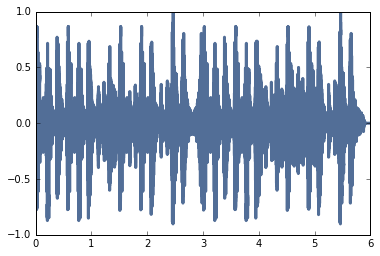

In [2]:
wave = thinkdsp.read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

This signal is sampled at 44100 Hz.  Here's what it sounds like.

In [3]:
wave.make_audio()

And here's the spectrum:

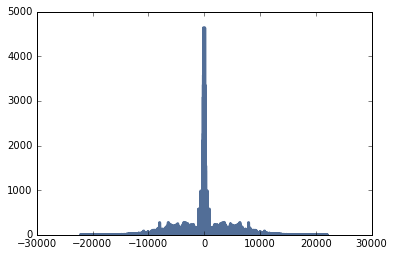

In [4]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

I'll reduce the sampling rate by a factor of 3 (but you can change this to try other values):

In [5]:
factor = 3
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

Before sampling we apply an anti-aliasing filter to remove frequencies above the new folding frequency, which is `framerate/2`:

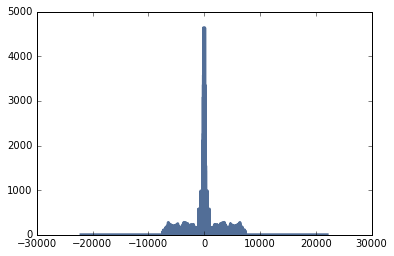

In [6]:
spectrum.low_pass(cutoff)
spectrum.plot()

Here's what it sounds like after filtering (still pretty good).

In [7]:
filtered = spectrum.make_wave()
filtered.make_audio()

Here's the function that simulates the sampling process:

In [8]:
def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = wave.ys[::factor]
    return thinkdsp.Wave(ys, framerate=wave.framerate) 

The result contains copies of the spectrum near 20 kHz; they are not very noticeable:

In [9]:
sampled = sample(filtered, factor)
sampled.make_audio()

But they show up when we plot the spectrum:

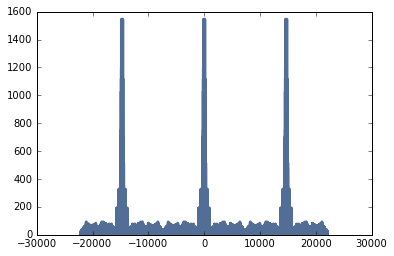

In [10]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

We can get rid of the spectral copies by applying the anti-aliasing filter again:

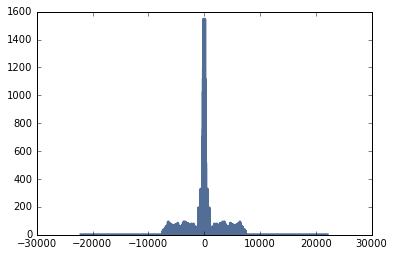

In [11]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

We just lost half the energy in the spectrum, but we can scale the result to get it back:

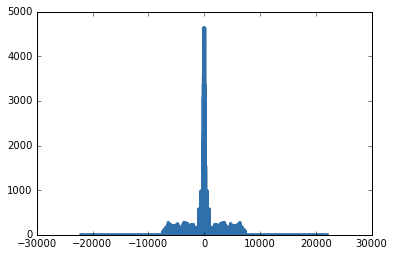

In [12]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Now the difference between the spectrum before and after sampling should be small.

In [13]:
spectrum.max_diff(sampled_spectrum)

9.0949470177292824e-12

After filtering and scaling, we can convert back to a wave:

In [14]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

And the difference between the interpolated wave and the filtered wave should be small.

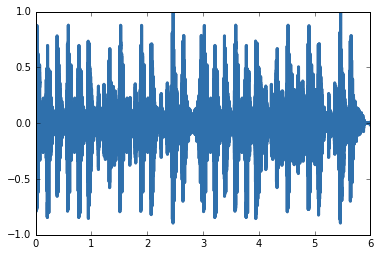

In [15]:
filtered.plot()
interpolated.plot()

Multiplying by `impulses` makes 4 shifted copies of the original spectrum.  One of them wraps around from the negative end of the spectrum to the positive, which is why there are 5 peaks in the spectrum off the sampled wave.

In [16]:
filtered.max_diff(interpolated)

3.663750800998542e-15